# Import packages

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import roc_curve, plot_roc_curve

# Define grid search results
Grid Search identified the following parameters as the best for the random forest classification model:
- max_depth: 5
- max_features: sqrt
- min_samples_leaf: 50
- n_estimators: 50

# Import data

In [2]:
X_train = pd.read_csv('../data/X_train_trans.csv', index_col=0)
X_test = pd.read_csv('../data/X_test_trans.csv', index_col=0)

pickle_in = open('../data/y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)

pickle_in = open('../data/y_test.pickle', 'rb')
y_test = pickle.load(pickle_in)

# Create and fit model

In [3]:
clf = RandomForestClassifier(max_depth = 5, 
                             max_features='sqrt', 
                             min_samples_leaf=50, 
                             n_estimators=50,
                             n_jobs=-1, 
                             bootstrap=True, 
                             random_state=3)
clf.fit(X_test, y_test);

In [4]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

In [5]:
print('Precision: {}\nAccuracy: {}\nRecall: {}\nF1: {}'.format(precision_score(y_test, y_pred), 
                accuracy_score(y_test, y_pred), 
                recall_score(y_test, y_pred), 
                f1_score(y_test, y_pred)))

Precision: 1.0
Accuracy: 0.878
Recall: 0.15862068965517243
F1: 0.2738095238095238


# Plot ROC Curve

In [6]:
# Create vanilla model for comparison
clf_van = RandomForestClassifier(random_state=3, n_jobs=-1)

In [7]:
clf_van.fit(X_test, y_test)
y_pred_van = clf_van.predict(X_test)
y_prob_van = clf_van.predict_proba(X_test)

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
fpr_v, tpr_v, thresholds_v = roc_curve(y_test, y_prob_van[:,1])

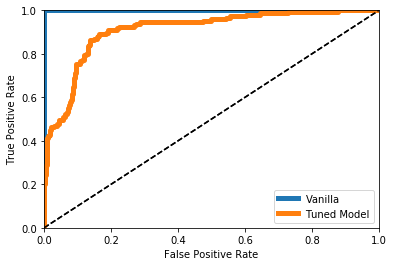

In [9]:
    def plot_roc_curve(fpr, tpr, label = None):
        plt.plot(fpr, tpr, linewidth =5 , label = label)
        plt.plot([0,1], [0,1], 'k--')
        plt.axis([0, 1, 0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

    plot_roc_curve(fpr_v, tpr_v, label = 'Vanilla')
    plot_roc_curve(fpr, tpr, label = 'Tuned Model')
    plt.legend()
    plt.show()